In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools
import yaml


In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

In [7]:
with open('config.yml', 'r') as archivo:
    config = yaml.safe_load(archivo)

In [9]:
buys = pd.read_csv('data/buys.csv')
sells = pd.read_csv('data/sells.csv')
wallet = pd.read_csv('data/wallet.csv')
prices = pd.read_csv(f"data/{config['ticker']}.csv")
performance = pd.read_csv('./data/model_results.csv')

# Grafico de velas

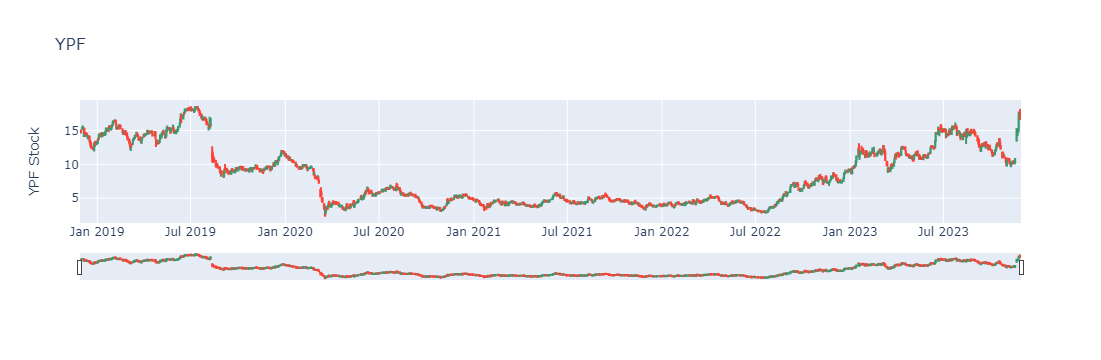

In [12]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
                open=prices['Open'],
                high=prices['High'],
                low=prices['Low'],
                close=prices['Close'])])

fig.update_layout(
    title=f"{config['ticker']}",
    yaxis_title=f"{config['ticker']} Stock"
)

fig.show()

# Estrategia

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['date'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

print('Area bajo la curva: ', auc(wallet.index, wallet['wallet']))

# Datos de ejemplo
x_prices = pd.to_datetime(wallet['date'])
y_prices = wallet['wallet']  # Datos para la línea


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='Wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Modelo

In [ ]:
threshold_down = 0.5
threshold_up = 0.5

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
threshold_down = 0.1
threshold_up = 0.9

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
plt.hist(performance.y_pred, color='lightgreen', ec='black', bins=50)
plt.show()

In [ ]:
buys.head(50)

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('./data/YPF.csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-12-06,14.190014,15.166255,14.081542,15.018339,730000,0.0,0.0
1,2018-12-07,15.136672,15.452224,14.614037,14.781674,542900,0.0,0.0
2,2018-12-10,14.594316,14.781675,14.120986,14.337929,841600,0.0,0.0
3,2018-12-11,14.377372,14.653481,14.022376,14.140708,767900,0.0,0.0
4,2018-12-12,14.278762,14.604176,14.150569,14.209735,842200,0.0,0.0
...,...,...,...,...,...,...,...,...
1252,2023-11-28,17.260000,17.299999,16.559999,16.790001,4087900,0.0,0.0
1253,2023-11-29,17.090000,17.299999,16.610001,16.980000,3102800,0.0,0.0
1254,2023-11-30,17.350000,17.350000,16.410000,16.610001,2980100,0.0,0.0
1255,2023-12-01,16.510000,16.780001,15.940000,16.150000,3718900,0.0,0.0


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date

In [8]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-12-06,14.190014,15.166255,14.081542,15.018339,730000,0.0,0.0
1,2018-12-07,15.136672,15.452224,14.614037,14.781674,542900,0.0,0.0
2,2018-12-10,14.594316,14.781675,14.120986,14.337929,841600,0.0,0.0
3,2018-12-11,14.377372,14.653481,14.022376,14.140708,767900,0.0,0.0
4,2018-12-12,14.278762,14.604176,14.150569,14.209735,842200,0.0,0.0
...,...,...,...,...,...,...,...,...
1252,2023-11-28,17.260000,17.299999,16.559999,16.790001,4087900,0.0,0.0
1253,2023-11-29,17.090000,17.299999,16.610001,16.980000,3102800,0.0,0.0
1254,2023-11-30,17.350000,17.350000,16.410000,16.610001,2980100,0.0,0.0
1255,2023-12-01,16.510000,16.780001,15.940000,16.150000,3718900,0.0,0.0


In [2]:
import pandas as pd

df = pd.read_csv('./data/YPF.csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-12-06 00:00:00-05:00,14.190014,15.166255,14.081542,15.018339,730000,0.0,0.0
1,2018-12-07 00:00:00-05:00,15.136672,15.452224,14.614037,14.781674,542900,0.0,0.0
2,2018-12-10 00:00:00-05:00,14.594316,14.781675,14.120986,14.337929,841600,0.0,0.0
3,2018-12-11 00:00:00-05:00,14.377372,14.653481,14.022376,14.140708,767900,0.0,0.0
4,2018-12-12 00:00:00-05:00,14.278762,14.604176,14.150569,14.209735,842200,0.0,0.0
...,...,...,...,...,...,...,...,...
1252,2023-11-28 00:00:00-05:00,17.260000,17.299999,16.559999,16.790001,4087900,0.0,0.0
1253,2023-11-29 00:00:00-05:00,17.090000,17.299999,16.610001,16.980000,3102800,0.0,0.0
1254,2023-11-30 00:00:00-05:00,17.350000,17.350000,16.410000,16.610001,2980100,0.0,0.0
1255,2023-12-01 00:00:00-05:00,16.510000,16.780001,15.940000,16.150000,3718900,0.0,0.0


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date

ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True, at position 63

In [5]:
df.iloc[61:64]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
61,2019-03-07 00:00:00-05:00,12.553711,12.791885,11.958279,12.643026,3559400,0.0,0.0
62,2019-03-08 00:00:00-05:00,12.960591,12.970515,12.523940,12.742266,2438700,0.0,0.0
63,2019-03-11 00:00:00-04:00,13.238460,13.546100,12.861353,13.526253,2222400,0.0,0.0
